In [10]:
from sklearn.model_selection import train_test_split
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from typing import List
import patsy
sys.path.append('../../')

from package.data.glm import simple_data
from package.plot_utils.glm import deviance_loss
from package.directories import eigenvalues_dir
from package.plot_utils.common import *
from package.generalization_bound.global_generalization import glm_expected_loss, upper_bound
from package.fim.fim import compute_fims_glm
from package.glm.glm import fit_w_con


df = simple_data(num_samples=100000, cap_at=3)

train, test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=TWO_PLOTS_FIGSIZE, dpi=DPI)
ns = [int(7e3), int(7e4), int(7e5), int(7e6)]
seeds = [0, 42, 123]
gen_errors = []

betas = [-0.87775693, -0.82247794]
expected_loss = glm_expected_loss(betas[0], betas[1])
for n in ns:
    gen_error = 0
    for seed in seeds:
        df = simple_data(num_samples=n, seed=seed)

        y, x = patsy.dmatrices('y ~ A + B + 0', df, return_type='matrix')

        gen_error += abs(expected_loss - deviance_loss(betas, x, y.reshape(-1)))

    gen_errors.append(gen_error / len(seeds))

axs[0].semilogx(ns, gen_errors, '-o', markersize=4)
axs[0].set_ylabel('Generalization Error')
axs[0].set_xlabel('Sample Size $n$')
axs[0].set_title('Generalization Error for Trained Parameters')

ns = [int(7e3), int(7e4), int(7e5), int(7e6)]
seeds = [0, 42, 123]
gen_errors_ = []

beta_li = np.random.uniform(-1, 1, (50, 2))
for n in ns:
    print('n')
    gen_error = 0
    for seed in seeds:
        df = simple_data(num_samples=n, seed=seed)

        y, x = patsy.dmatrices('y ~ A + B + 0', df, return_type='matrix')

        max_gen_error = 0
        for betas in beta_li:
            expected_loss = glm_expected_loss(betas[0], betas[1])
            temp = abs(expected_loss - deviance_loss(betas, x, y.reshape(-1)))
            if max_gen_error < temp:
                max_gen_error = temp 

        gen_error += max_gen_error

    gen_errors_.append(gen_error / len(seeds))

axs[1].semilogx(ns, gen_errors_, '-o', markersize=4)
axs[1].set_ylabel('Generalization Error')
axs[1].set_xlabel('Sample Size $n$')
axs[1].set_title('Generalization Error Across Parameter Range $[-1,1]^2$')

Text(0.5, 1.0, 'Generalization Error Across Parameter Range $[-1,1]^2$')

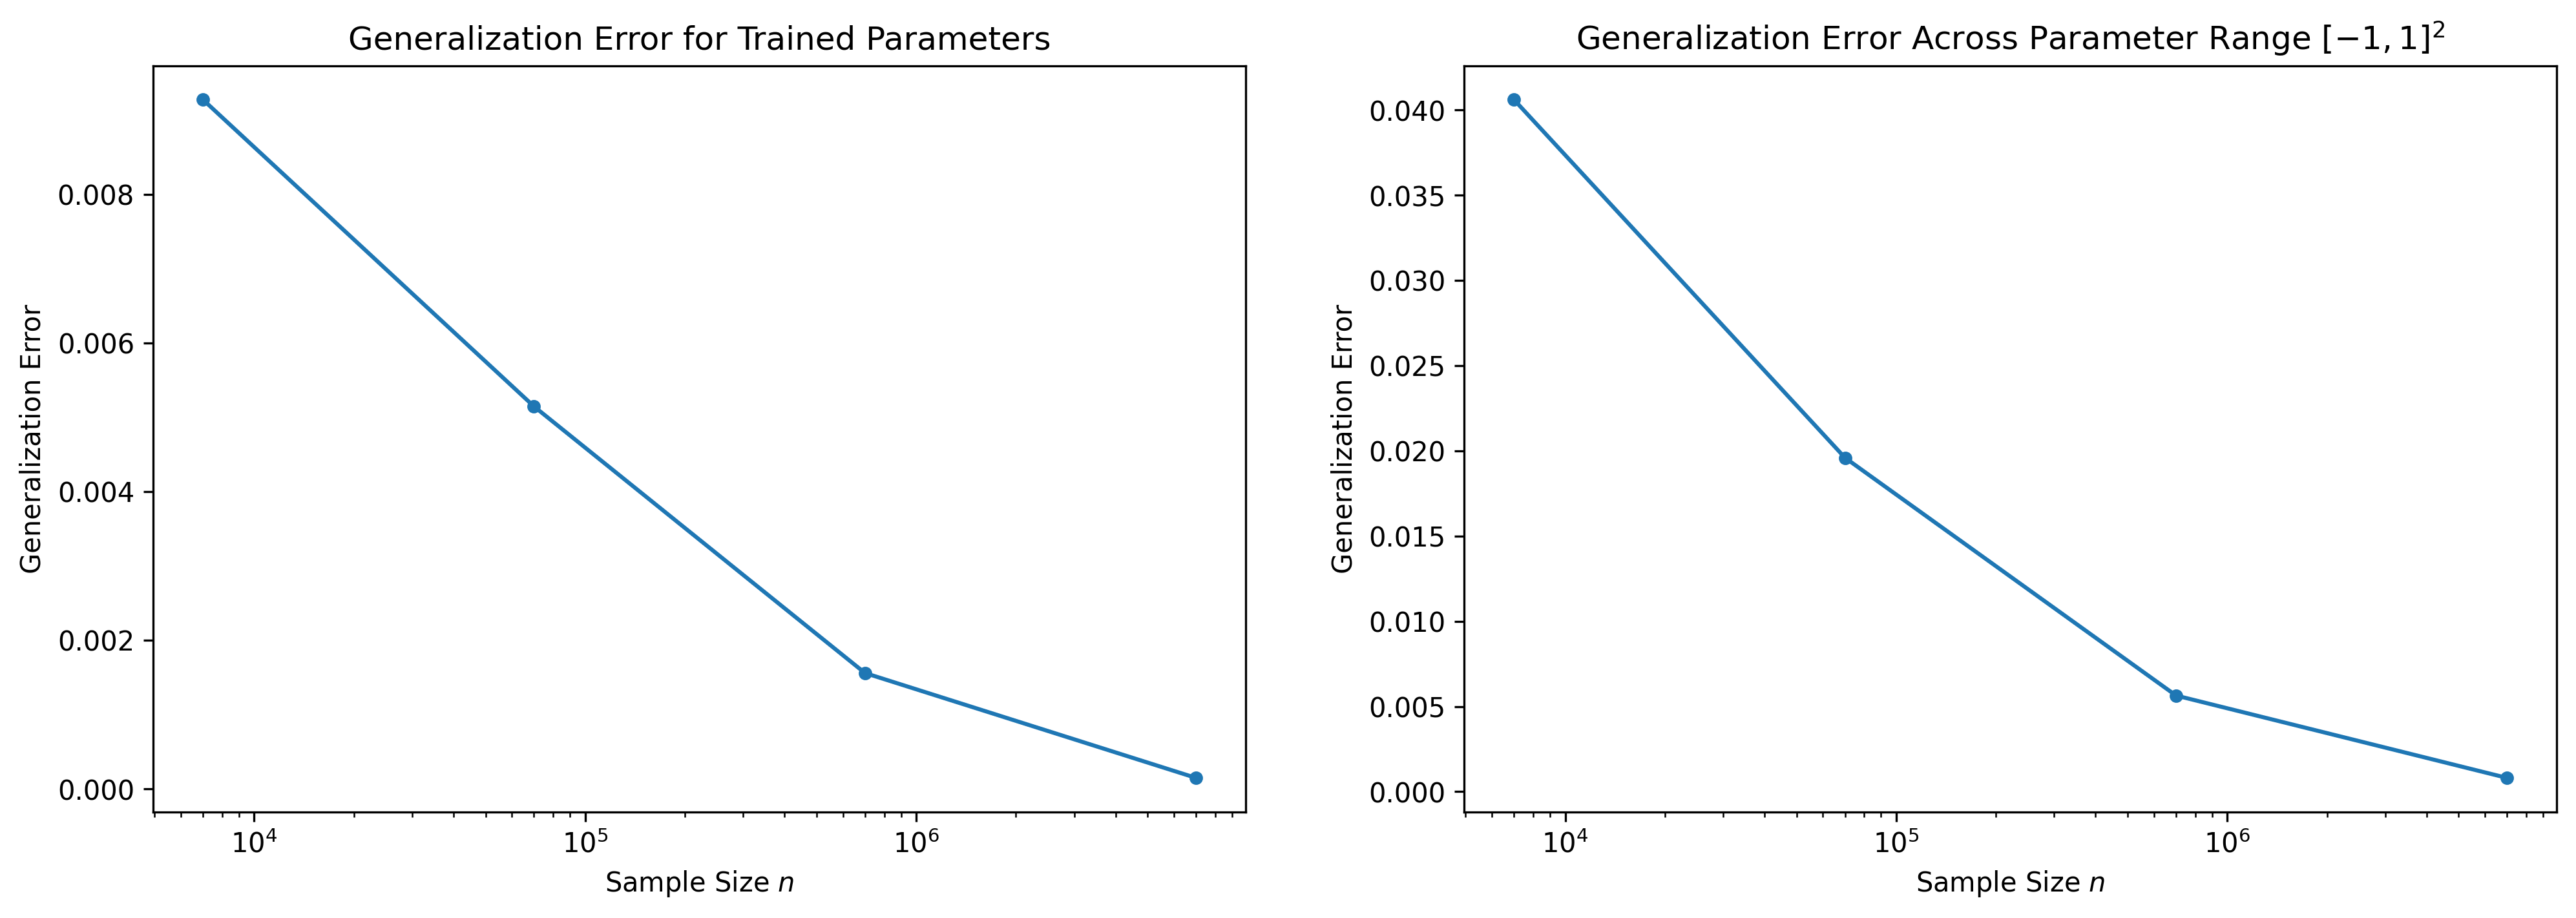

In [6]:
fig, axs = plt.subplots(1, 2, figsize=TWO_PLOTS_FIGSIZE, dpi=DPI)
ns = [int(7e3), int(7e4), int(7e5), int(7e6)]
seeds = [0, 42, 123]
gen_errors = []

betas = [-0.87775693, -0.82247794]
expected_loss = glm_expected_loss(betas[0], betas[1])
for n in ns:
    gen_error = 0
    for seed in seeds:
        df = simple_data(num_samples=n, seed=seed)

        y, x = patsy.dmatrices('y ~ A + B + 0', df, return_type='matrix')

        gen_error += abs(expected_loss - deviance_loss(betas, x, y.reshape(-1)))

    gen_errors.append(gen_error / len(seeds))

axs[0].semilogx(ns, gen_errors, '-o', markersize=4)
axs[0].set_ylabel('Generalization Error')
axs[0].set_xlabel('Sample Size $n$')
axs[0].set_title('Generalization Error for Trained Parameters')

ns = [int(7e3), int(7e4), int(7e5), int(7e6)]
seeds = [0, 42, 123]
gen_errors_ = []

beta_li = np.random.uniform(-1, 1, (50, 2))
for n in ns:
    gen_error = 0
    for seed in seeds:
        df = simple_data(num_samples=n, seed=seed)

        y, x = patsy.dmatrices('y ~ A + B + 0', df, return_type='matrix')

        max_gen_error = 0
        for betas in beta_li:
            expected_loss = glm_expected_loss(betas[0], betas[1])
            temp = abs(expected_loss - deviance_loss(betas, x, y.reshape(-1)))
            if max_gen_error < temp:
                max_gen_error = temp 

        gen_error += max_gen_error

    gen_errors_.append(gen_error / len(seeds))

axs[1].semilogx(ns, gen_errors_, '-o', markersize=4)
axs[1].set_ylabel('Generalization Error')
axs[1].set_xlabel('Sample Size $n$')
axs[1].set_title('Generalization Error Across Parameter Range $[-1,1]^2$')

In [7]:
M = 18
B = 4 *(3 * (np.log2(3/0.01)-1) + 0.5)
d = 2

n = 70000

print('Max gamma:', 32 * np.pi * M**2 / (d*B**2))

Max gamma: 2.0678498962274547


2.7366534760775787


Text(0, 0.5, 'Lower Bound')

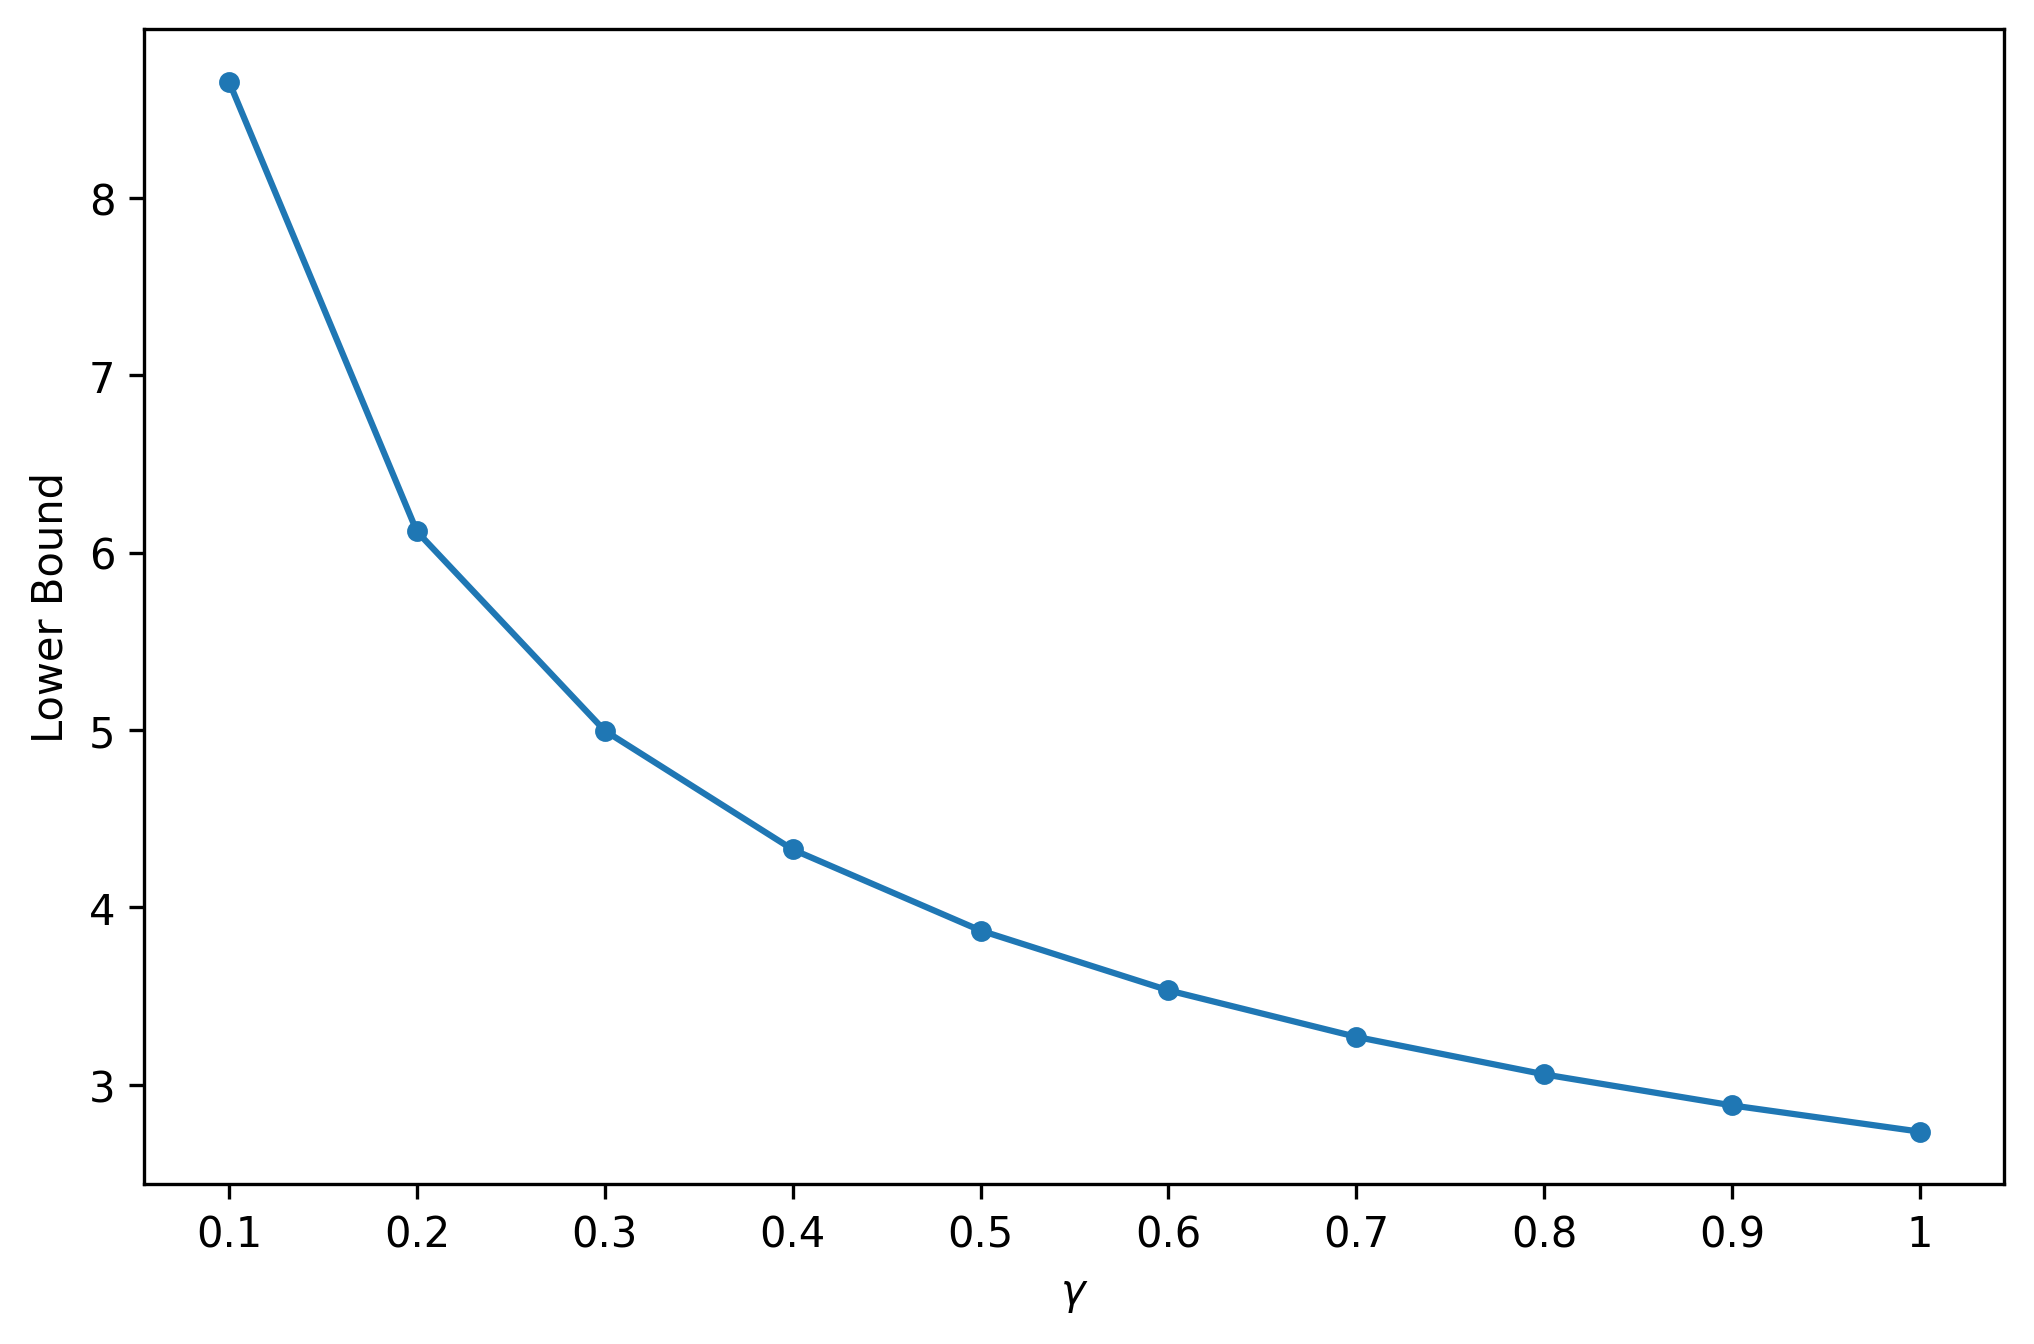

In [8]:
plt.figure(figsize=SINGLE_PLOT_FIGSIZE, dpi=DPI)

gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n = 70000

# M
lower_bounds = []
for gamma in gammas:
    lower_bound = 4 * M * np.sqrt(2 * np.pi * np.log2(n) / (gamma * n))
    # lower_bound_plot_options.append(LowerBoundPlotOption(ns, M, gamma))
    lower_bounds.append(lower_bound)

print(lower_bounds[-1])

plt.plot(range(len(gammas)), lower_bounds, '-o', markersize=4)
plt.xticks(range(len(gammas)), gammas)
plt.xlabel('$\gamma$')
plt.ylabel('Lower Bound')


Computing Eigenvalues: 100%|██████████| 1000/1000 [00:02<00:00, 374.12it/s]


0.39939550903142707 0.017615541788951944 0.09123535655684846


Computing EDs with chunk_size=100: 100%|██████████| 1/1 [00:00<00:00, 2396.75it/s]


Text(0, 0.5, '(log) Generalization Bound')

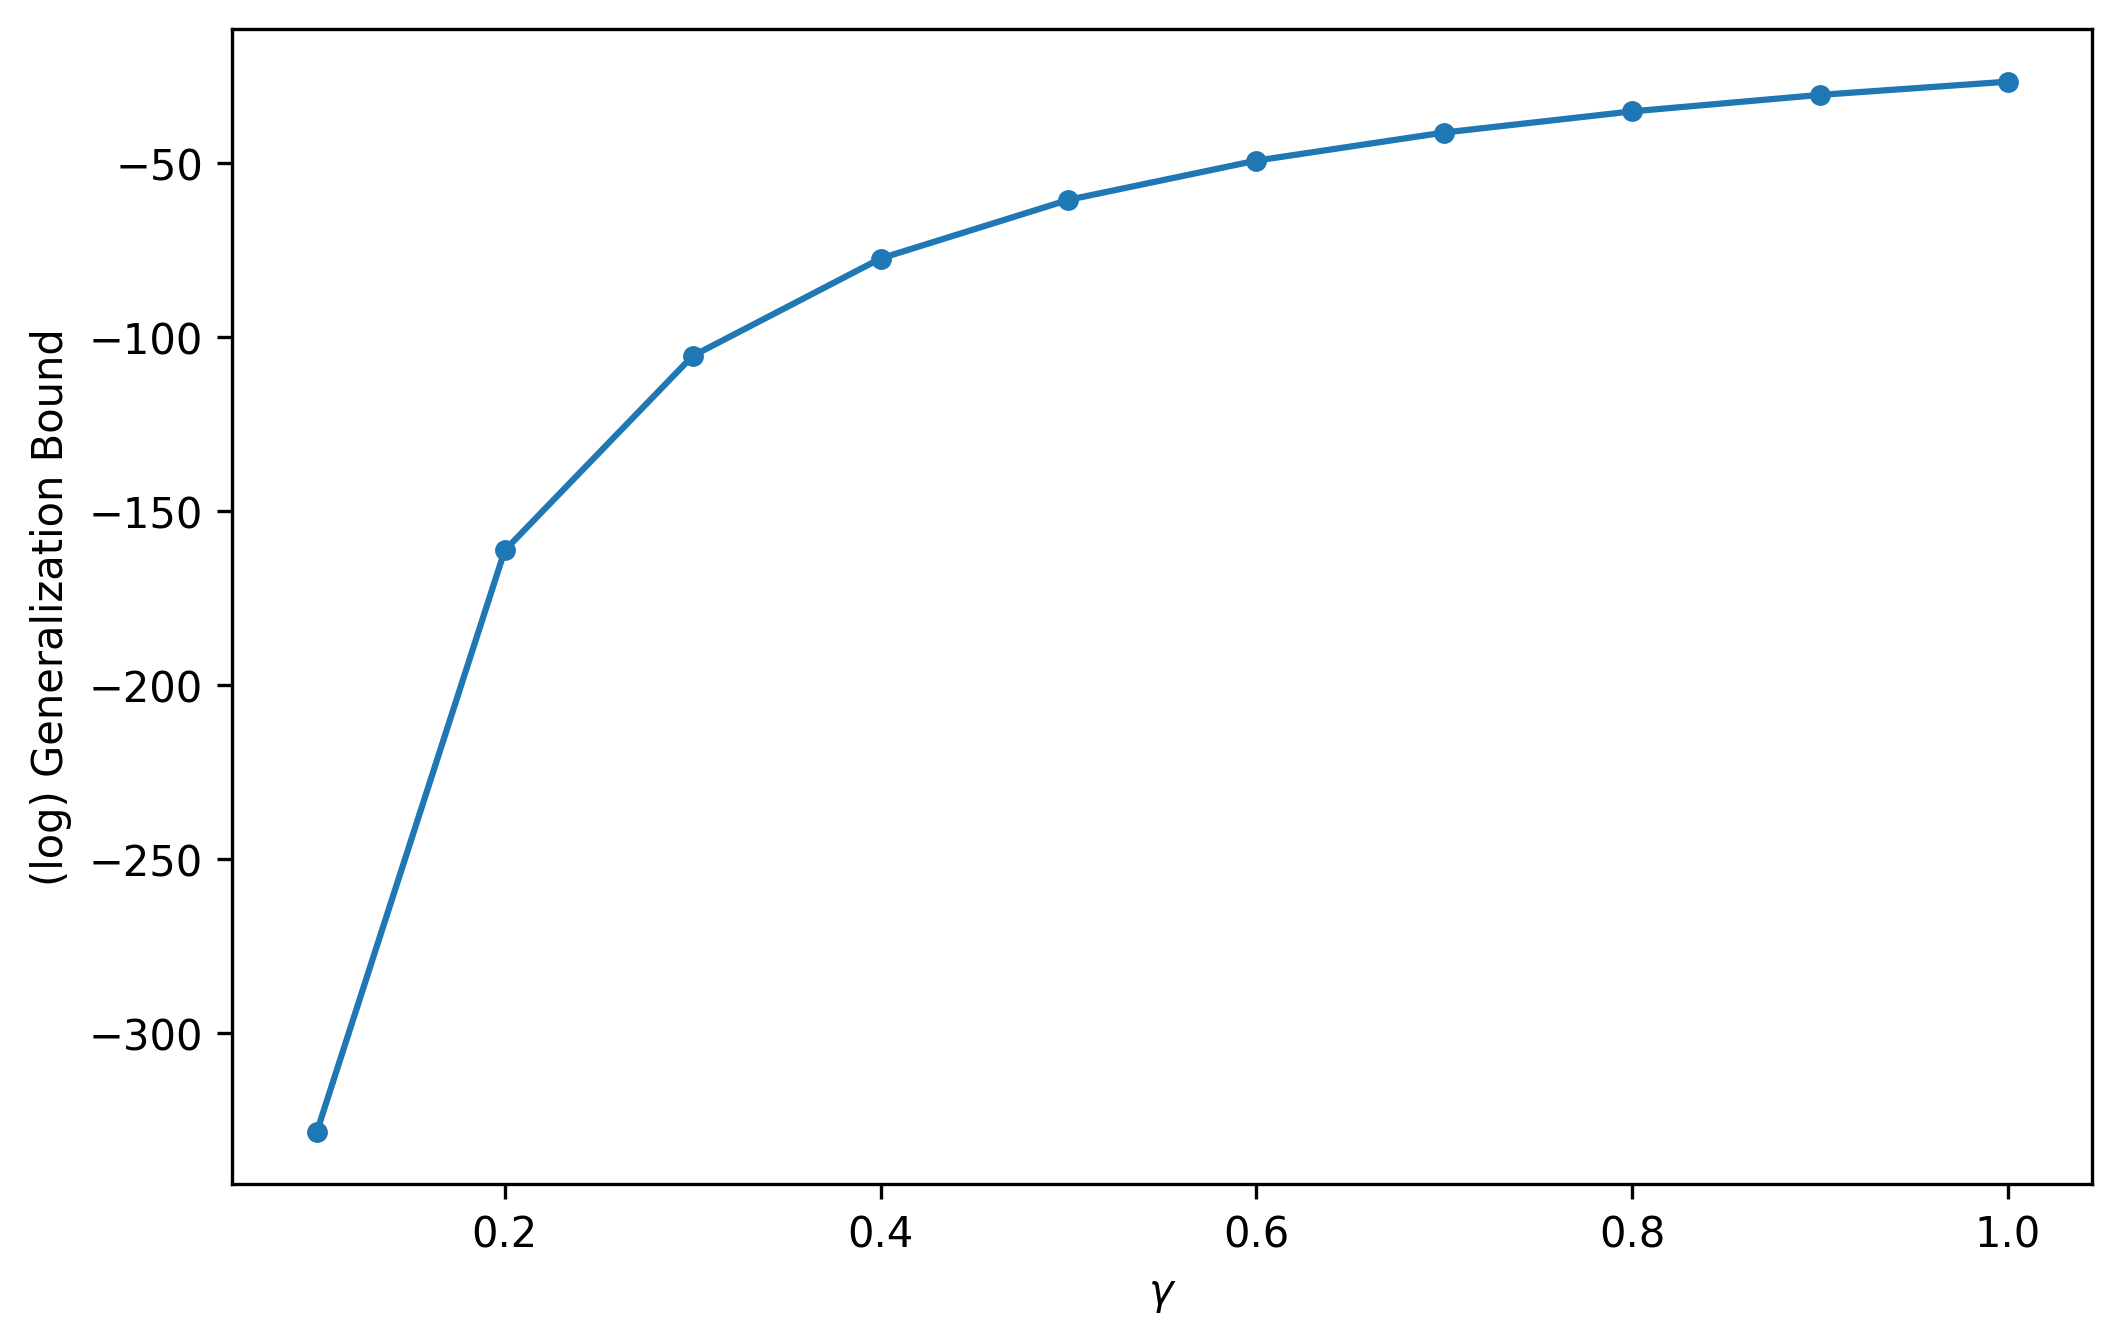

In [16]:
y, x = patsy.dmatrices('y ~ A + B + 0', df, return_type='matrix')

compute_fims_glm(2, 1000, save_dir=os.path.join(eigenvalues_dir, 'temp'), filename='temp', con_min=0.01, con_max=0.5, features=x)

gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

file_path = os.path.join(eigenvalues_dir, 'temp', 'temp_2.h5')

ef = EffectiveDimensionApprox(file_path)

c = 2 * np.sqrt(2)

fig, ax = plt.subplots(1, 1, figsize=SINGLE_PLOT_FIGSIZE, dpi=DPI)

# M
upper_bounds = []
for gamma in gammas:
    eff_dims = ef.compute(n, EDType.GLOBAL, gamma=gamma)

    upper_bounds.append(upper_bound(n, c, eff_dims, M, B, gamma, use_log=True))

ax.plot(gammas, upper_bounds, '-o', markersize=4)
ax.set_xlabel('$\\gamma$')
ax.set_ylabel('(log) Generalization Bound')